<a href="https://colab.research.google.com/github/U-11-Agar/timeseries-analysis/blob/main/deep_learning_trading_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid', palette='rainbow')

In [4]:
df=yf.download('ITC.NS',start="2020-01-01")
df.dropna(inplace=True,axis=0)
df.head(20)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,238.600006,238.600006,237.100006,238.100006,201.114258,4208837
2020-01-02,238.199997,240.949997,238.100006,239.850006,202.592392,8402979
2020-01-03,241.000000,241.000000,238.000000,238.500000,201.452103,9284478
2020-01-06,237.500000,238.300003,235.000000,235.100006,198.580261,7636617
2020-01-07,236.050003,237.899994,234.600006,235.350006,198.791443,8416741
2020-01-08,234.000000,235.800003,233.250000,234.199997,197.820053,7043211
2020-01-09,235.600006,236.600006,235.050003,235.800003,199.171524,9452653
2020-01-10,237.600006,238.750000,236.800003,238.000000,201.029755,9973746
2020-01-13,238.500000,240.500000,238.250000,239.250000,202.085587,12243639


In [5]:
demo=df["Open"]-df["Adj Close"]
demo.head(30)

Date
2020-01-01    37.485748
2020-01-02    35.607605
2020-01-03    39.547897
2020-01-06    38.919739
2020-01-07    37.258560
2020-01-08    36.179947
2020-01-09    36.428482
2020-01-10    36.570251
2020-01-13    36.414413
2020-01-14    34.785721
2020-01-15    37.803711
2020-01-16    39.147385
2020-01-17    38.073135
2020-01-20    35.726059
2020-01-21    40.040115
2020-01-22    38.527985
2020-01-23    37.154694
2020-01-24    36.243515
2020-01-27    38.842072
2020-01-28    39.844040
2020-01-29    31.610535
2020-01-30    39.256638
2020-01-31    37.127502
2020-02-03    39.647964
2020-02-04    28.648438
2020-02-05    33.472702
2020-02-06    37.622223
2020-02-07    33.548920
2020-02-10    36.156219
2020-02-11    36.924652
dtype: float64

In [6]:
df.loc[(df == 0).any(axis=1),'Volume']=df['Volume'].mean()

In [7]:
df.Volume

Date
2020-01-01     4208837.0
2020-01-02     8402979.0
2020-01-03     9284478.0
2020-01-06     7636617.0
2020-01-07     8416741.0
                 ...    
2023-07-10     6521300.0
2023-07-11     8457557.0
2023-07-12    12340934.0
2023-07-13     7909757.0
2023-07-14     5081059.0
Name: Volume, Length: 879, dtype: float64

In [8]:
df.dropna(inplace=True,axis=0)
df[(df == 0).any(axis=1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [9]:
df.info()
# no empty or missing data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 879 entries, 2020-01-01 to 2023-07-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       879 non-null    float64
 1   High       879 non-null    float64
 2   Low        879 non-null    float64
 3   Close      879 non-null    float64
 4   Adj Close  879 non-null    float64
 5   Volume     879 non-null    float64
dtypes: float64(6)
memory usage: 48.1 KB


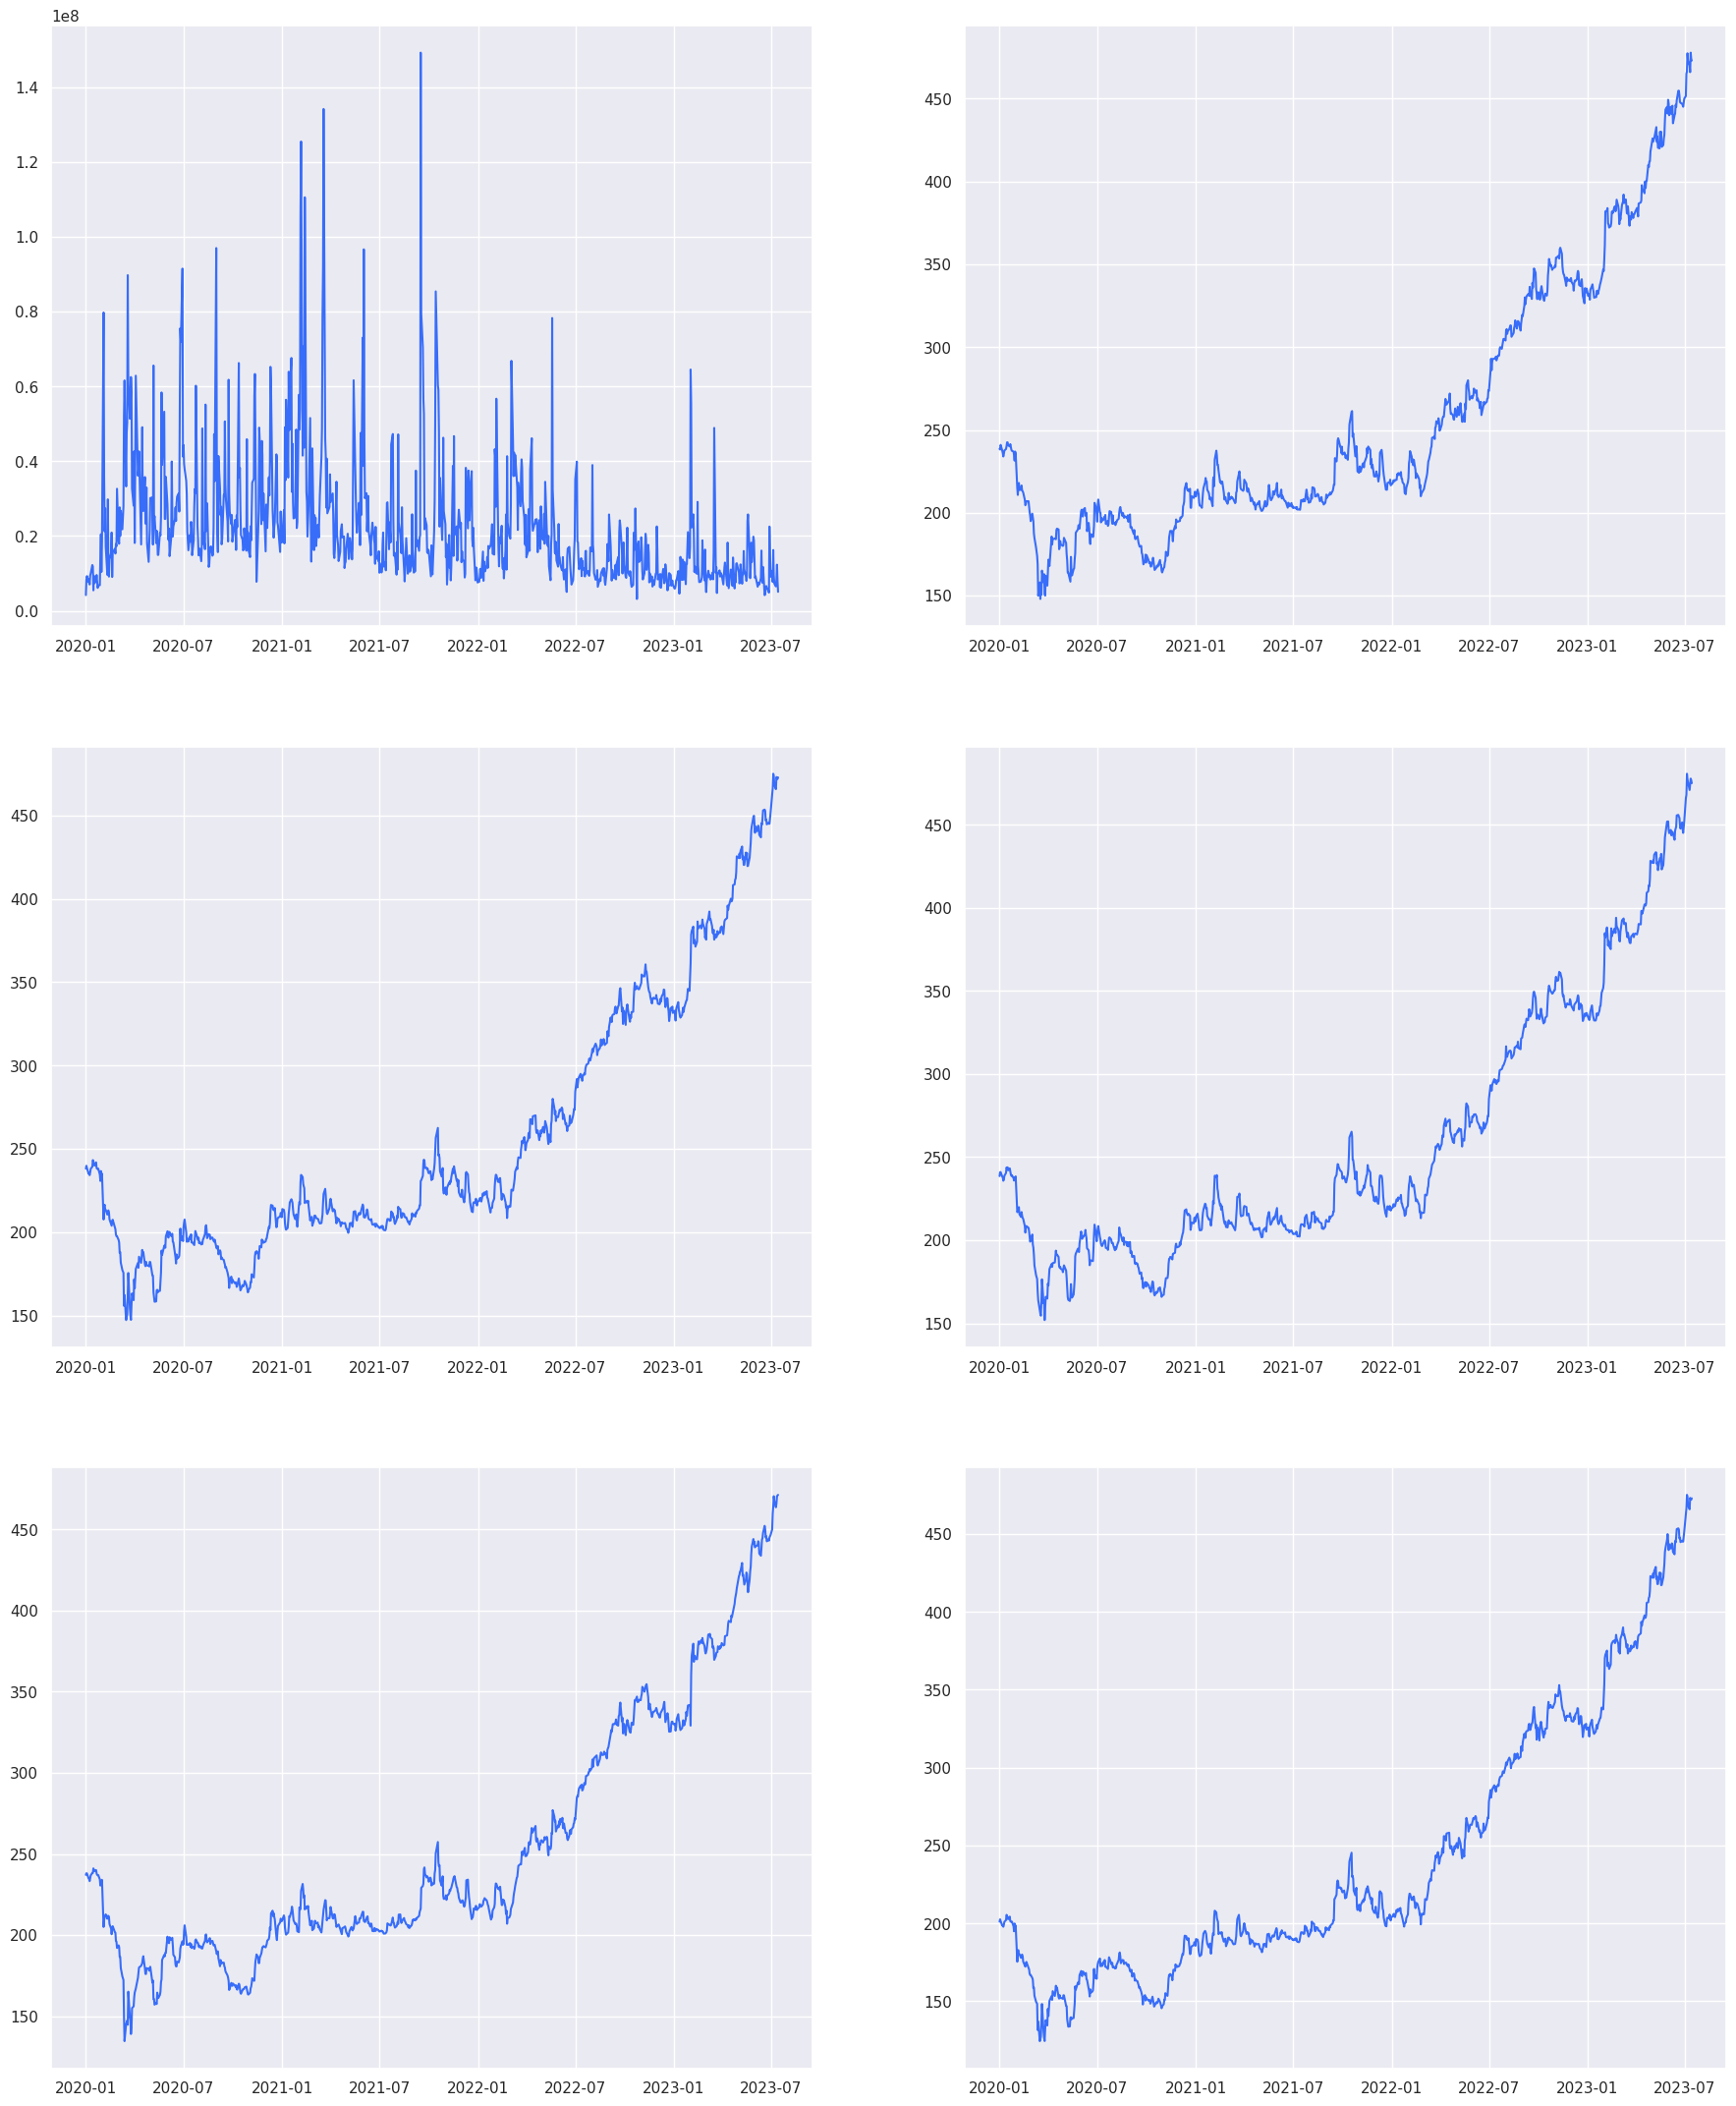

In [10]:
fig,ax=plt.subplots(3,2,figsize=(22,27))
ax[0,0].plot(df['Volume'])
ax[0,1].plot(df['Open'])
ax[1,0].plot(df['Close'])
ax[1,1].plot(df['High'])
ax[2,0].plot(df['Low'])
ax[2,1].plot(df['Adj Close'])
plt.show()

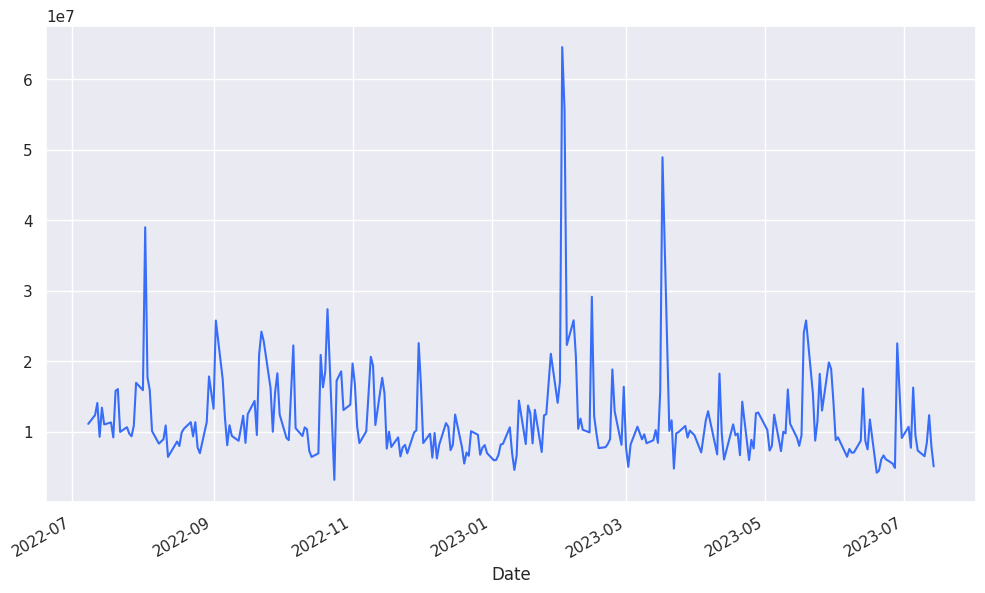

In [11]:
fig=plt.figure(figsize=(12,7))
df['Volume'].tail(252).plot()
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_scaled.std()

Open         1.000569
High         1.000569
Low          1.000569
Close        1.000569
Adj Close    1.000569
Volume       1.000569
dtype: float64

        daily  mv_avg_2  mv_avg_3  mv_avg_5  mv_avg__8  mv_avg_13  mv_avg_21  \
0   -0.243824       NaN       NaN       NaN        NaN        NaN        NaN   
1   -0.221337 -0.232581       NaN       NaN        NaN        NaN        NaN   
2   -0.238684 -0.230011 -0.234615       NaN        NaN        NaN        NaN   
3   -0.282373 -0.260529 -0.247465       NaN        NaN        NaN        NaN   
4   -0.279161 -0.280767 -0.266739 -0.253076        NaN        NaN        NaN   
..        ...       ...       ...       ...        ...        ...        ...   
874  2.682686  2.699070  2.728088  2.734984   2.654979   2.567781   2.517415   
875  2.776489  2.729588  2.724876  2.752460   2.700033   2.593579   2.538648   
876  2.765566  2.771028  2.741580  2.745264   2.733282   2.617944   2.560278   
877  2.761712  2.763639  2.767922  2.740381   2.747336   2.644879   2.576554   
878  2.773276  2.767494  2.766851  2.751946   2.757857   2.671764   2.593932   

     mv_avg_34  mv_avg_55  daily_vol  m

<Axes: >

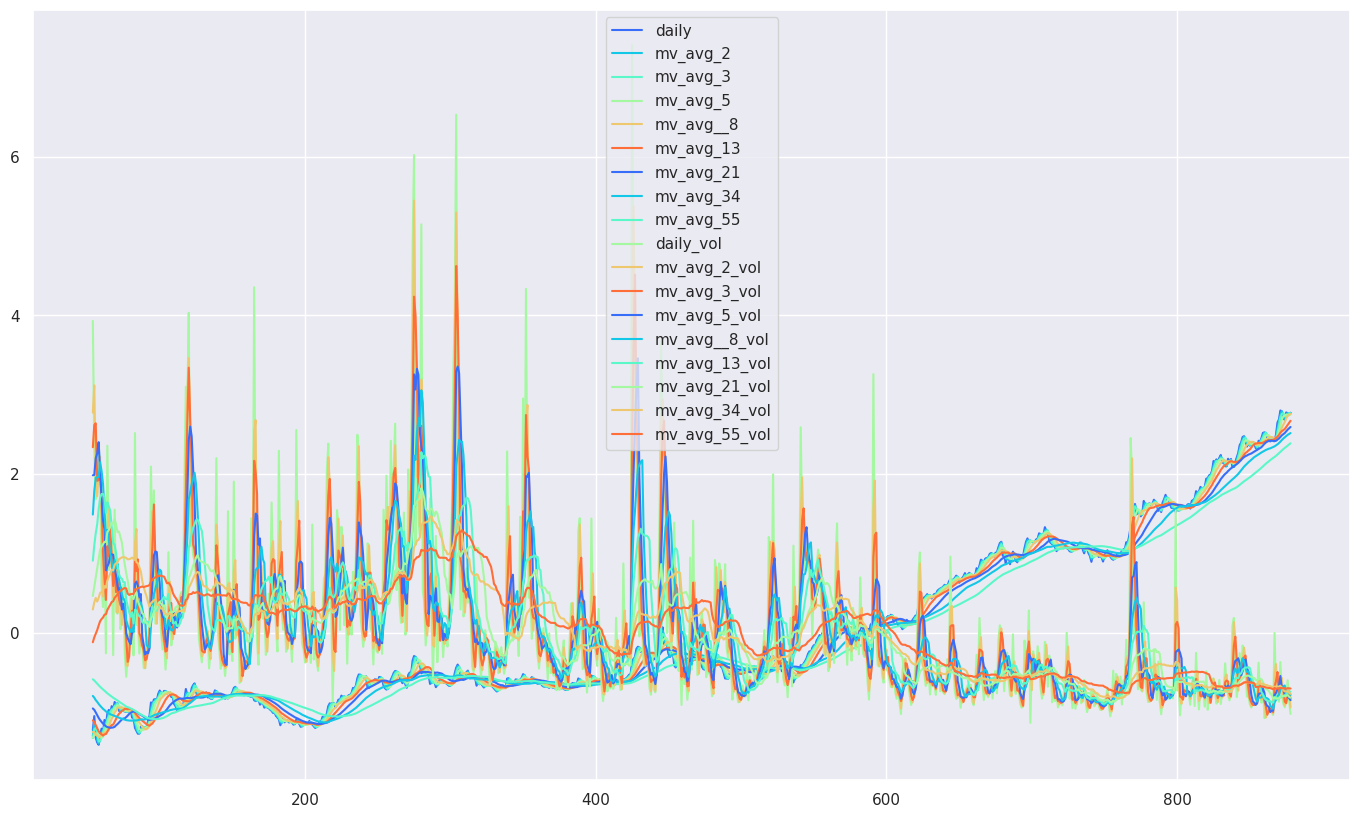

In [13]:
train_data=pd.DataFrame()
# using moving avgerage with fibonacci day frame
train_data['daily']=df_scaled['Close']
train_data['mv_avg_2']=df_scaled['Close'].rolling(window=2).mean()
train_data['mv_avg_3']=df_scaled['Close'].rolling(window=3).mean()
train_data['mv_avg_5']=df_scaled['Close'].rolling(window=5).mean()
train_data['mv_avg__8']=df_scaled['Close'].rolling(window=8).mean()
train_data['mv_avg_13']=df_scaled['Close'].rolling(window=13).mean()
train_data['mv_avg_21']=df_scaled['Close'].rolling(window=21).mean()
train_data['mv_avg_34']=df_scaled['Close'].rolling(window=34).mean()
train_data['mv_avg_55']=df_scaled['Close'].rolling(window=55).mean()
train_data['daily_vol']=df_scaled['Volume']
train_data['mv_avg_2_vol']=df_scaled['Volume'].rolling(window=2).mean()
train_data['mv_avg_3_vol']=df_scaled['Volume'].rolling(window=3).mean()
train_data['mv_avg_5_vol']=df_scaled['Volume'].rolling(window=5).mean()
train_data['mv_avg__8_vol']=df_scaled['Volume'].rolling(window=8).mean()
train_data['mv_avg_13_vol']=df_scaled['Volume'].rolling(window=13).mean()
train_data['mv_avg_21_vol']=df_scaled['Volume'].rolling(window=21).mean()
train_data['mv_avg_34_vol']=df_scaled['Volume'].rolling(window=34).mean()
train_data['mv_avg_55_vol']=df_scaled['Volume'].rolling(window=55).mean()
# train_data['vol_change']=df_scaled['Volume'].pct_change() #negative and small correlation with aother variable
print(train_data)

train_data.dropna(axis=0,inplace=True)
print(train_data.cov())
print(train_data.corr())
train_data.plot(figsize=(17,10))


In [14]:
y_data=pd.DataFrame()
y_data['Close']=df_scaled['Close']
print(y_data.iloc[42,:])

Close   -0.79379
Name: 42, dtype: float64


In [15]:
n_steps=3
n_features=train_data.columns.shape[0]
X = []
y = []
for i in np.arange(n_steps, len(train_data)):
    X.append(train_data.iloc[i-n_steps:i, :])
    y.append(y_data.iloc[i,:])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], n_steps, n_features))
print(X.shape)
print(y.shape)

(822, 3, 18)
(822, 1)


In [16]:
# !pip install keras

In [17]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, LeakyReLU
from keras.optimizers import Adam

model = Sequential()
model.add(Bidirectional(LSTM(units=32, return_sequences=True, input_shape=(n_steps, n_features), use_bias=True,activation=LeakyReLU(alpha=0.9999))))
model.add(Bidirectional(LSTM(units=44, return_sequences=True, use_bias=True,activation=LeakyReLU(alpha=0.6666),dropout=0.25)))
model.add(Bidirectional(LSTM(units=128, return_sequences=True, use_bias=True,activation=LeakyReLU(alpha=0.6666),dropout=0.75)))
model.add(Bidirectional(LSTM(units=64, use_bias=True,activation=LeakyReLU(alpha=0.9999),dropout=0.5)))
model.add(Dense(units=1, activation='linear'))
model.compile(loss='mse', optimizer=Adam(0.001,clipnorm=0.01), metrics=['accuracy','mse','mae'])
# model.build()
# model.summary()


In [18]:
history = model.fit(X, y, epochs=50, batch_size=32)
# history = model.fit(X, y, epochs=100, batch_size=12, validation_data=(X, y))

Epoch 1/50
26/26 [==============================] - 14s 51ms/step - loss: 0.3429 - accuracy: 0.0000e+00 - mse: 0.3429 - mae: 0.4259
Epoch 2/50
26/26 [==============================] - 1s 49ms/step - loss: 0.0880 - accuracy: 0.0000e+00 - mse: 0.0880 - mae: 0.2223
Epoch 3/50
26/26 [==============================] - 1s 44ms/step - loss: 0.0692 - accuracy: 0.0000e+00 - mse: 0.0692 - mae: 0.2008
Epoch 4/50
26/26 [==============================] - 1s 53ms/step - loss: 0.0555 - accuracy: 0.0000e+00 - mse: 0.0555 - mae: 0.1788
Epoch 5/50
26/26 [==============================] - 1s 44ms/step - loss: 0.0517 - accuracy: 0.0000e+00 - mse: 0.0517 - mae: 0.1734
Epoch 6/50
26/26 [==============================] - 1s 46ms/step - loss: 0.0470 - accuracy: 0.0000e+00 - mse: 0.0470 - mae: 0.1703
Epoch 7/50
26/26 [==============================] - 1s 49ms/step - loss: 0.0437 - accuracy: 0.0000e+00 - mse: 0.0437 - mae: 0.1653
Epoch 8/50
26/26 [==============================] - 2s 63ms/step - loss: 0.0409 - 

In [19]:
y_predit=model.predict(X)

26/26 [==============================] - 1s 6ms/step


In [20]:
y.shape

(822, 1)

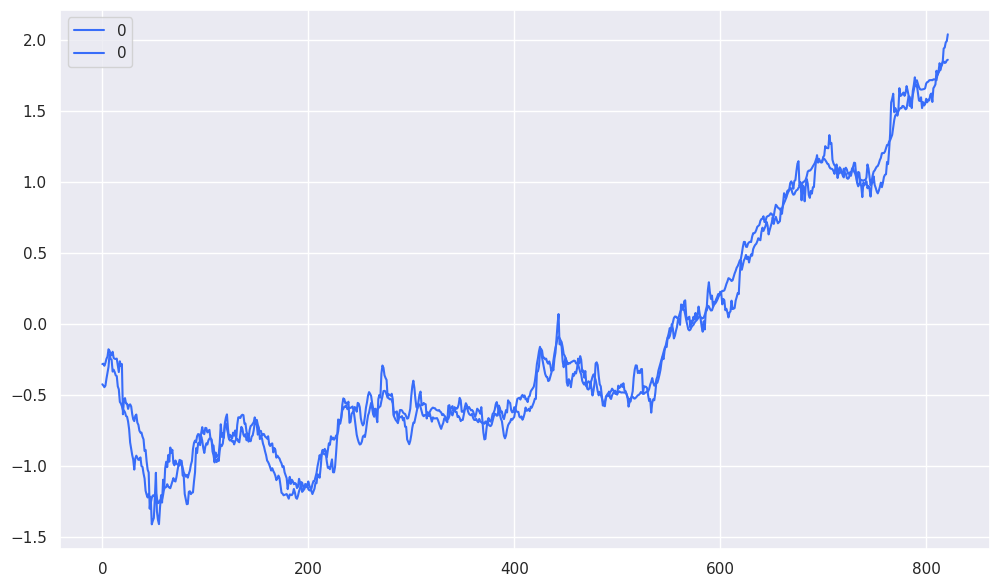

In [21]:
fig=plt.figure(figsize=(12,7))
sns.lineplot(y)
sns.lineplot(y_predit,color='black')
plt.show()

In [22]:

def calculate_moving_average(dataframe, win):
    ma = dataframe.rolling(window=win).mean()
    return pd.Series(ma, name=f'MA_{win}')


def calculate_relative_strength_index(dataframe, window):
    delta = dataframe.diff()
    up = delta.where(delta > 0, 0)
    down = -delta.where(delta < 0, 0)
    ema_up = up.ewm(span=window, adjust=True,ignore_na=True).mean()
    ema_down = down.ewm(span=window, adjust=True,ignore_na=True).mean()
    avg_gain = up.rolling(window=window, min_periods=1).mean()
    avg_loss = down.rolling(window=window, min_periods=1).mean()
    rs_mva = avg_gain / avg_loss
    rs_ewm = ema_up / ema_down
    rsi_mva = 100 - (100 / (1 + rs_mva))
    rsi_ewm = 100 - (100 / (1 + rs_ewm))
    return pd.DataFrame({f"RSI_ewm_{window}": rsi_ewm,f"RSI_mva_{window}":rsi_mva},index=dataframe.index)

def calculate_bollinger_bands(dataframe, window):
    ma = dataframe.rolling(window=window).mean()
    std = dataframe.rolling(window=window).std()
    upper_band = ma + (2 * std)
    lower_band = ma - (2 * std)
    return pd.DataFrame({f'bb_Upper_Band_{window}': upper_band, f'bb_Lower_Band_{window}': lower_band},index=dataframe.index)

def calculate_stochastic_oscillator(dataframe, window):
    low = dataframe.rolling(window=window).min()
    high = dataframe.rolling(window=window).max()
    k = 100 * ((dataframe - low) / (high - low))
    d = k.rolling(window=3).mean()
    return pd.DataFrame({'%K': k, '%D': d},index=dataframe.index)

def train_data_build(df):
  data_model=pd.DataFrame(df['Adj Close'],index=df.index)
  # Example usage
  # stock_data = pd.read_csv('stock_data.csv')
  # stock_data['Date'] = pd.to_datetime(dataframe['Date'])
  data_model=pd.concat([data_model,calculate_moving_average(df['Adj Close'],2)],axis=1)
  data_model=pd.concat([data_model,calculate_moving_average(df['Adj Close'],3)],axis=1)
  data_model=pd.concat([data_model,calculate_moving_average(df['Adj Close'],5)],axis=1)
  data_model=pd.concat([data_model,calculate_moving_average(df['Adj Close'],8)],axis=1)
  data_model=pd.concat([data_model,calculate_moving_average(df['Adj Close'],13)],axis=1)
  data_model=pd.concat([data_model,calculate_moving_average(df['Adj Close'],21)],axis=1)
  data_model=pd.concat([data_model,calculate_moving_average(df['Adj Close'],34)],axis=1)
  data_model = pd.concat([data_model,calculate_relative_strength_index(df['Adj Close'],9)],axis=1)
  data_model = pd.concat([data_model,calculate_relative_strength_index(df['Adj Close'],14)],axis=1)
  data_model = pd.concat([data_model,calculate_relative_strength_index(df['Adj Close'],25)],axis=1)
  data_model = pd.concat([data_model,calculate_bollinger_bands(df['Adj Close'],20)],axis=1)
  data_model = pd.concat([data_model,calculate_stochastic_oscillator(df['Adj Close'],14)],axis=1)
  data_model.corr()
  # bb_df = calculate_bollinger_bands(dataframe)
  # # stochastic_df = calculate_stochastic_oscillator(dataframe)
  # # Combine all the indicators into one DataFrame
  # data_model = pd.concat([data_model,ma_df, rsi_df],ignore_index=True)
  # # data_model[indicators_df.columns] = indicators_df
  # # data_model.dropna(inplace=True, axis=0)
  # data_model.info()
  data_model.dropna(inplace=True,axis=0)
  return data_model
  # print(indicators_df.head())
x=train_data_build(df_scaled)

<Axes: >

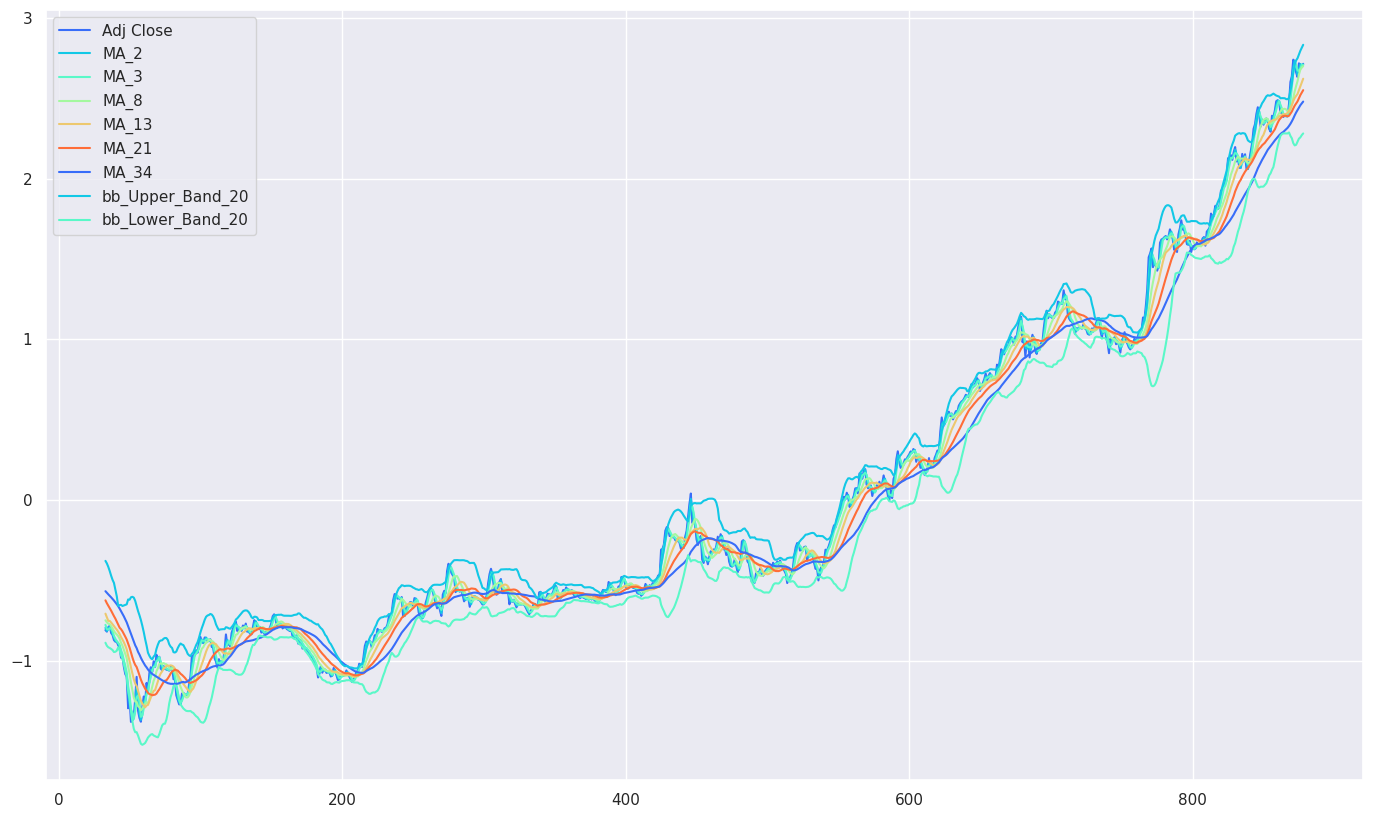

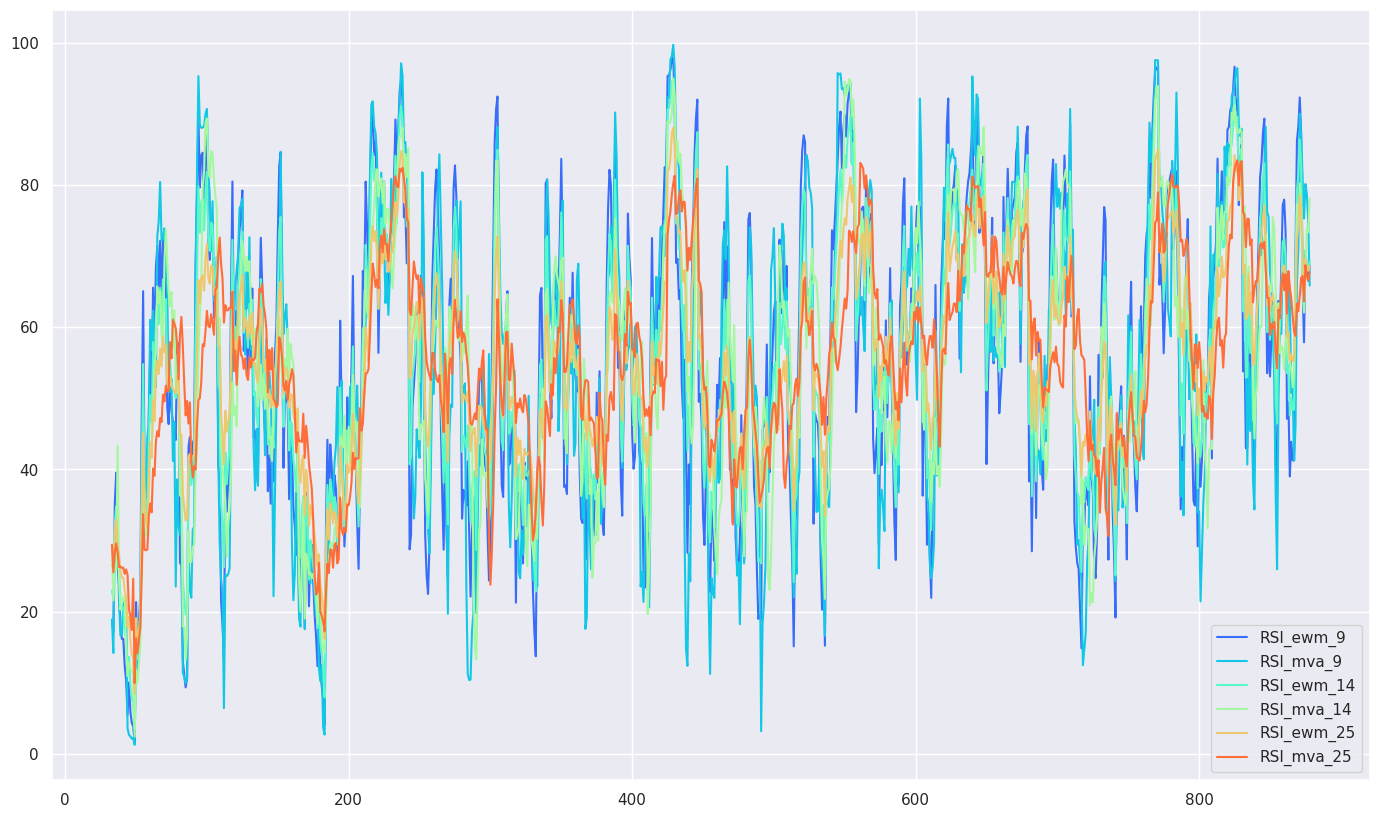

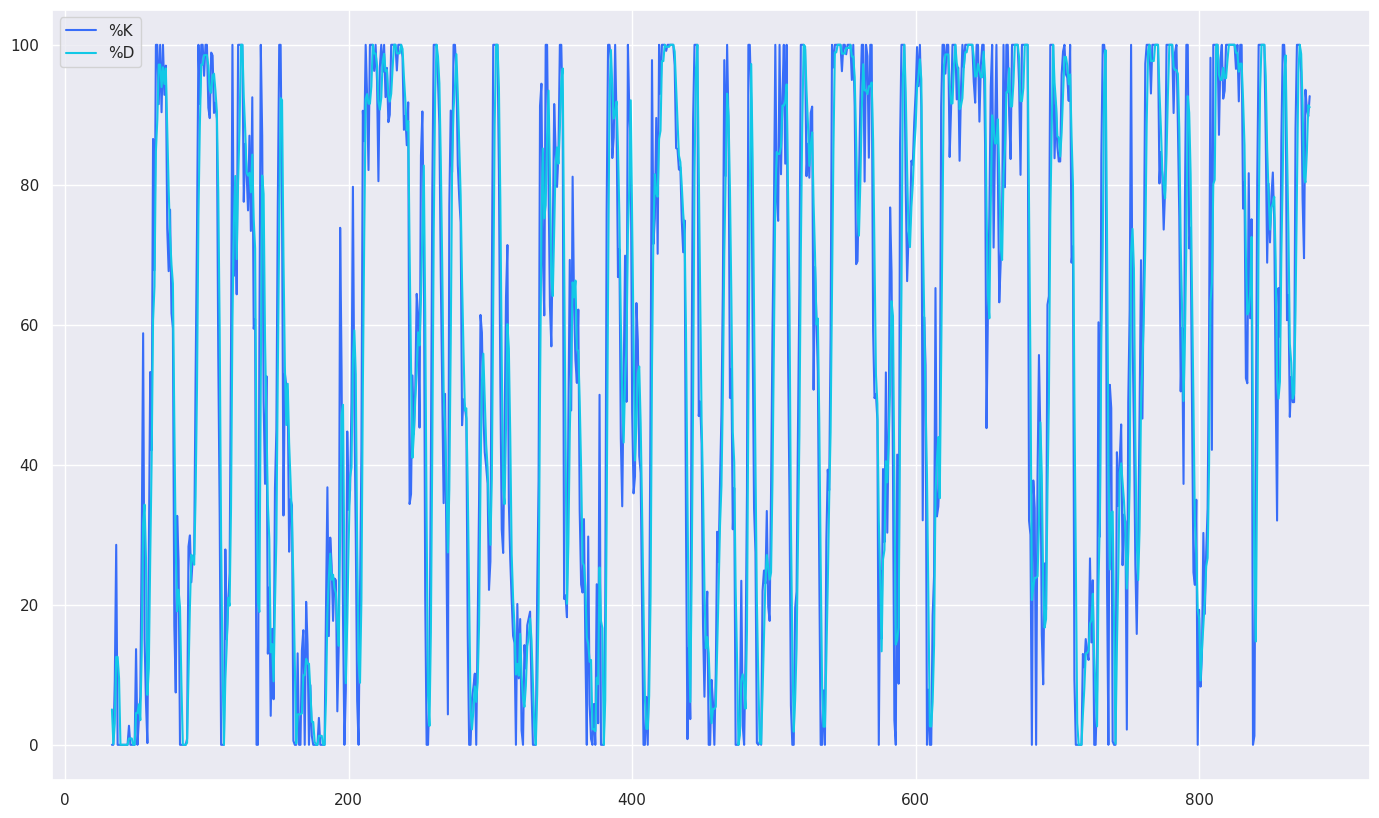

In [23]:
x[['Adj Close','MA_2','MA_3','MA_8','MA_13','MA_21','MA_34','bb_Upper_Band_20','bb_Lower_Band_20']].plot(figsize=(17,10))
x[['RSI_ewm_9','RSI_mva_9','RSI_ewm_14','RSI_mva_14','RSI_ewm_25','RSI_mva_25']].plot(figsize=(17,10))
x[['%K','%D']].plot(figsize=(17,10))

In [24]:
df=pd.DataFrame({"1":[1,2,3,4,4,5,5]})
low = df.rolling(window=2).min()

In [25]:
low


,1
0,NaN
1,1.0
2,2.0
3,3.0
4,4.0
5,4.0
6,5.0


In [26]:
import pandas as pd

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Epoch 1/40
49/49 [==============================] - 31s 612ms/step - loss: 0.2974 - mse: 0.2974 - mae: 0.3684
Epoch 2/40
49/49 [==============================] - 27s 561ms/step - loss: 0.0948 - mse: 0.0948 - mae: 0.2209
Epoch 3/40
49/49 [==============================] - 28s 578ms/step - loss: 0.1072 - mse: 0.1072 - mae: 0.2260
Epoch 4/40
49/49 [==============================] - 28s 564ms/step - loss: 0.0949 - mse: 0.0949 - mae: 0.2161
Epoch 5/40
49/49 [==============================] - 28s 568ms/step - loss: 0.0703 - mse: 0.0703 - mae: 0.1945
Epoch 6/40
49/49 [==============================] - 29s 583ms/step - loss: 0.0606 - mse: 0.0606 - mae: 0.1838
Epoch 7/40
49/49 [==============================] - 28s 564ms/step - loss: 0.0571 - mse: 0.0571 - mae: 0.1783
Epoch 8/40
49/49 [==============================] - 28s 563ms/step - loss: 0.0574 - mse: 0.0

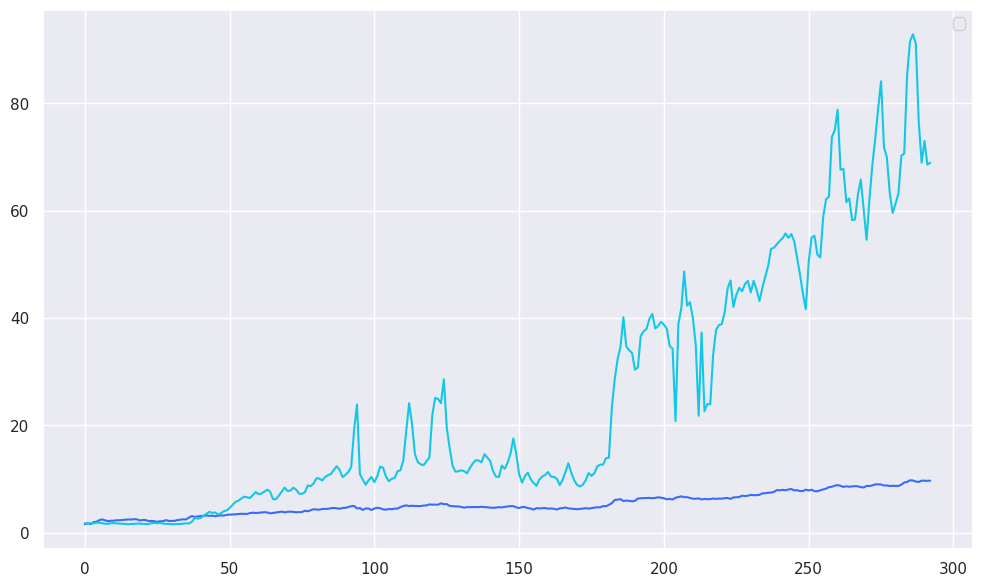

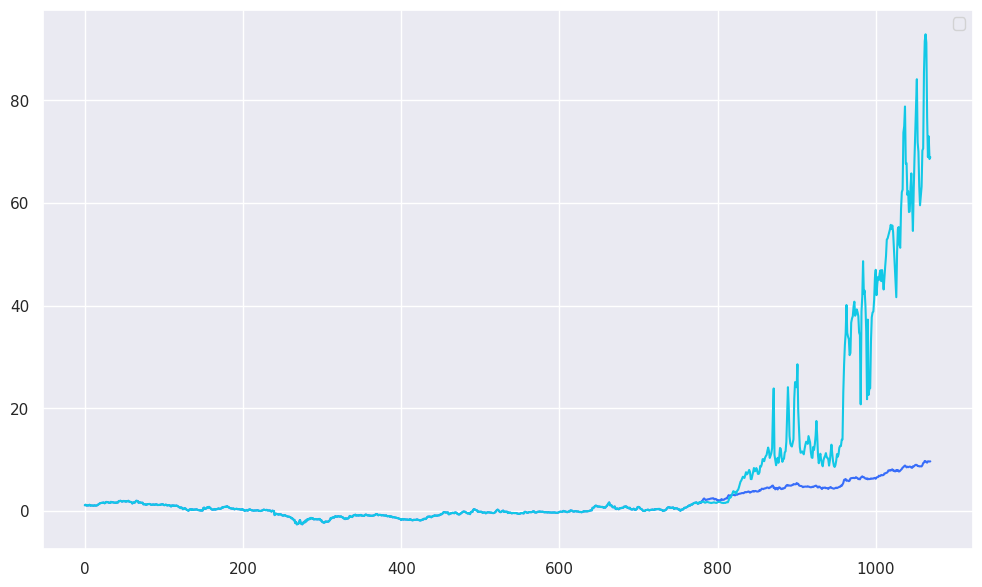

In [54]:
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, LeakyReLU,Dropout,BatchNormalization
from keras.losses import mean_squared_error
from keras.optimizers import Adam
from keras.metrics import RootMeanSquaredError
from sklearn.preprocessing import StandardScaler
# Define the LSTM model architecture

# Define the symbol for the stock to trade
symbol = ['ITC.NS']

# Download historical stock prices for the given symbol
df = yf.download(tickers=symbol, start="2019-01-01",end="2022-04-01")
df_test = yf.download(tickers=symbol, start="2022-04-01")
df.dropna(inplace=True, axis=0)
df_test.dropna(inplace=True, axis=0)
# df.set_index('Date', inplace=True)


# Define the trading signals dataframe
trading_signals = pd.DataFrame(columns=['signal', 'price'])
trading_signals.loc[df_test.index[0], 'signal'] = 'Hold'
trading_signals.loc[df_test.index[0], 'price'] = df['Adj Close'][0]


def data_reshape(x_train, y_train, n_steps, n_features, X, y):
    for i in np.arange(n_steps, len(x_train)):
        X.append(x_train.iloc[i-n_steps:i, :])
        y.append(y_train.iloc[i, :])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], n_steps, n_features))
    return X, y

# Define the trading strategy function


def trading_strategy(model, X,y_pred):
    y_pred = model.predict(X)
    return y_pred


def lstm_model(model,n_steps,n_features):
  model.add(Bidirectional(LSTM(units=84, return_sequences=True, input_shape=(n_steps, n_features), use_bias=True,activation=LeakyReLU(alpha=0.9999))))
  model.add(Bidirectional(LSTM(units=112, return_sequences=True, use_bias=True,activation=LeakyReLU(alpha=0.6666),dropout=0.25)))
  model.add(Bidirectional(LSTM(units=112, return_sequences=True, use_bias=True,activation=LeakyReLU(alpha=0.3333),dropout=0.25)))
  model.add(Bidirectional(LSTM(units=112, return_sequences=True, use_bias=True,activation=LeakyReLU(alpha=0.6666),dropout=0.25)))
  model.add(Bidirectional(LSTM(units=336, return_sequences=True, use_bias=True,activation=LeakyReLU(alpha=0.9999),dropout=0.75)))
  model.add(Bidirectional(LSTM(units=168, use_bias=True,activation=LeakyReLU(alpha=0.9999),dropout=0.5)))
  model.add(Dense(units=1, activation='linear'))
  # model.compile(loss='Binary_cr', optimizer=Adam(0.001,clipnorm=0.01), metrics=['accuracy','mse','mae'])
  model.compile(loss='mse', optimizer=Adam(0.001,clipnorm=0.01), metrics=['mse','mae'], run_eagerly=True)
  # model.compile(optimizer='adam', loss=mean_squared_error)
  return model


def create_data_model(df):
  data_model=pd.DataFrame(df['Adj Close'],index=df.index)
  # Example usage
  # stock_data = pd.read_csv('stock_data.csv')
  # stock_data['Date'] = pd.to_datetime(dataframe['Date'])
  data_model=pd.concat([data_model,calculate_moving_average(df['Adj Close'],2)],axis=1)
  data_model=pd.concat([data_model,calculate_moving_average(df['Adj Close'],3)],axis=1)
  data_model=pd.concat([data_model,calculate_moving_average(df['Adj Close'],5)],axis=1)
  data_model=pd.concat([data_model,calculate_moving_average(df['Adj Close'],8)],axis=1)
  data_model=pd.concat([data_model,calculate_moving_average(df['Adj Close'],13)],axis=1)
  data_model=pd.concat([data_model,calculate_moving_average(df['Adj Close'],21)],axis=1)
  # data_model=pd.concat([data_model,calculate_moving_average(df['Adj Close'],34)],axis=1)
  data_model = pd.concat([data_model,calculate_relative_strength_index(df['Adj Close'],9)],axis=1)
  data_model = pd.concat([data_model,calculate_relative_strength_index(df['Adj Close'],14)],axis=1)
  data_model = pd.concat([data_model,calculate_relative_strength_index(df['Adj Close'],25)],axis=1)
  data_model = pd.concat([data_model,calculate_bollinger_bands(df['Adj Close'],20)],axis=1)
  data_model = pd.concat([data_model,calculate_stochastic_oscillator(df['Adj Close'],14)],axis=1)
  data_model.corr()
  # bb_df = calculate_bollinger_bands(dataframe)
  # # stochastic_df = calculate_stochastic_oscillator(dataframe)
  # # Combine all the indicators into one DataFrame
  # data_model = pd.concat([data_model,ma_df, rsi_df],ignore_index=True)
  # # data_model[indicators_df.columns] = indicators_df
  # # data_model.dropna(inplace=True, axis=0)
  # data_model.info()
  data_model.dropna(inplace=True,axis=0)
  return data_model
    # print(indicators_df.head())


def calculate_moving_average(dataframe, win):
    ma = dataframe.rolling(window=win).mean().dropna(axis=0)
    return pd.Series(ma, name=f'MA_{win}')


def calculate_relative_strength_index(dataframe, window):
    delta = dataframe.diff()
    up = delta.where(delta > 0, 0)
    down = -delta.where(delta < 0, 0)
    ema_up = up.ewm(span=window, adjust=True,ignore_na=True).mean().dropna(axis=0)
    ema_down = down.ewm(span=window, adjust=True,ignore_na=True).mean().dropna(axis=0)
    avg_gain = up.rolling(window=window, min_periods=1).mean().dropna(axis=0)
    avg_loss = down.rolling(window=window, min_periods=1).mean().dropna(axis=0)
    rs_mva = avg_gain / avg_loss
    rs_ewm = ema_up / ema_down
    rsi_mva = 100 - (100 / (1 + rs_mva))
    rsi_ewm = 100 - (100 / (1 + rs_ewm))
    return pd.DataFrame({f"RSI_ewm_{window}": rsi_ewm,f"RSI_mva_{window}":rsi_mva},index=dataframe.index)

def calculate_bollinger_bands(dataframe, window):
    ma = dataframe.rolling(window=window).mean().dropna(axis=0)
    std = dataframe.rolling(window=window).std().dropna(axis=0)
    upper_band = ma + (2 * std)
    lower_band = ma - (2 * std)
    return pd.DataFrame({f'bb_Upper_Band_{window}': upper_band, f'bb_Lower_Band_{window}': lower_band},index=dataframe.index)

def calculate_stochastic_oscillator(dataframe, window):
    low = dataframe.rolling(window=window).min().dropna(axis=0)
    high = dataframe.rolling(window=window).max().dropna(axis=0)
    k = 100 * ((dataframe - low) / (high - low))
    d = k.rolling(window=3).mean()
    return pd.DataFrame({'%K': k, '%D': d},index=dataframe.index)


data_model = create_data_model(df)
data_test_model=create_data_model(df_test)
scaler=StandardScaler()
df_scaled_model=pd.DataFrame(scaler.fit_transform(data_model),columns=data_model.columns)
df_test_scaled_model=pd.DataFrame(scaler.fit_transform(data_test_model),columns=data_test_model.columns)

# Define the number of time steps and features for the LSTM model
n_steps = 6
n_features = df_scaled_model.shape[1]

model = Sequential()
model = lstm_model(model,n_steps,n_features)
# Train the LSTM model
X_train = df_scaled_model
# y_train = data_model[['Open', 'Close']]
y_train = df_scaled_model[['Adj Close']]
# X_train.dropna(inplace=True,axis=0)
# y_train.dropna(inplace=True,axis=0)
X = []
y = []
X, y = data_reshape(X_train, y_train, n_steps, n_features, X, y)
model.fit(X, y, epochs=40, batch_size=16)
x_test=df_test_scaled_model
y_test=df_test_scaled_model[['Adj Close']]
X_test=[]
Y_test=[]
X_test,Y_test=data_reshape(x_test, y_test, n_steps, n_features, X_test, Y_test)

y_pred = []
y_pred = trading_strategy(model, X_test,y_pred)

fig=plt.figure(figsize=(12,7))
plt.plot(Y_test)
plt.plot(y_pred)
plt.legend()
plt.show()
fig=plt.figure(figsize=(12,7))
plt.plot(np.append(y,Y_test))
plt.plot(np.append(y,y_pred))
plt.legend()
plt.show()

10/10 [==============================] - 4s 356ms/step


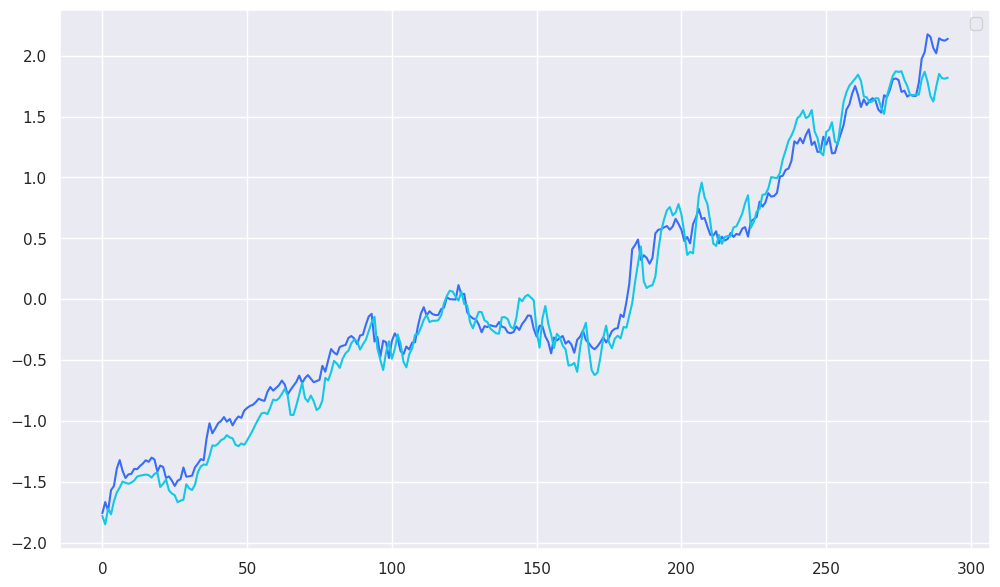

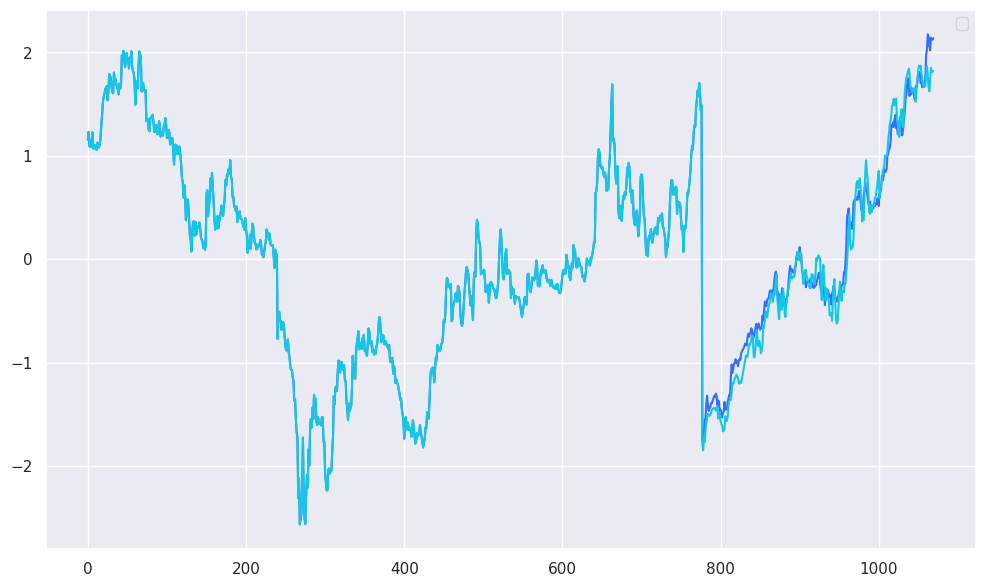

In [55]:
df_test_scaled_model=pd.DataFrame(scaler.fit_transform(data_test_model),columns=data_test_model.columns)
x_test=df_test_scaled_model
y_test=df_test_scaled_model[['Adj Close']]
X_test=[]
Y_test=[]
X_test,Y_test=data_reshape(x_test, y_test, n_steps, n_features, X_test, Y_test)

y_pred = []
y_pred = trading_strategy(model, X_test,y_pred)

fig=plt.figure(figsize=(12,7))
plt.plot(Y_test)
plt.plot(y_pred)
plt.legend()
plt.show()
fig=plt.figure(figsize=(12,7))
plt.plot(np.append(y,Y_test))
plt.plot(np.append(y,y_pred))
plt.legend()
plt.show()

In [35]:
df_test_scaled=pd.DataFrame(scaler.transform(df_test),columns=df_test.columns)

In [36]:
X_test

array([[[ 3.15893713,  3.26776737,  3.24666083, ...,  2.1074162 ,
         79.70468556, 93.23489519],
        [ 3.01449211,  3.08671462,  3.18334228, ...,  2.1366559 ,
         66.23619855, 81.9802947 ],
        [ 3.08770503,  3.05109857,  3.08704476, ...,  2.14665841,
         73.06279039, 73.00122483]],

       [[ 3.01449211,  3.08671462,  3.18334228, ...,  2.1366559 ,
         66.23619855, 81.9802947 ],
        [ 3.08770503,  3.05109857,  3.08704476, ...,  2.14665841,
         73.06279039, 73.00122483],
        [ 3.09782889,  3.09276696,  3.06667534, ...,  2.16960618,
         74.00676946, 71.10191947]],

       [[ 3.08770503,  3.05109857,  3.08704476, ...,  2.14665841,
         73.06279039, 73.00122483],
        [ 3.09782889,  3.09276696,  3.06667534, ...,  2.16960618,
         74.00676946, 71.10191947],
        [ 3.19908644,  3.14845766,  3.12820678, ...,  2.17316176,
         83.44832704, 76.83929563]],

       ...,

       [[11.68513755, 11.7989735 , 11.85347694, ..., 10.0953229

In [37]:
X_train['Adj Close'].iloc[1]

-0.5766694038151178

In [56]:
# Define the trading rules based on the predicted values
for i in range(len(x_test)-n_steps):
    if y_pred[i] > x_test['Adj Close'].iloc[i+n_steps]:
        trading_signals.loc[x_test.index[i+n_steps], 'signal'] = 'Buy'
        trading_signals.loc[x_test.index[i+n_steps],
                            'price'] = x_test['Adj Close'].iloc[i+n_steps]
    elif y_pred[i] < x_test['Adj Close'].iloc[i+n_steps]:
        trading_signals.loc[x_test.index[i+n_steps], 'signal'] = 'Sell'
        trading_signals.loc[x_test.index[i+n_steps],
                            'price'] = x_test['Adj Close'].iloc[i+n_steps]
    else:
        trading_signals.loc[x_test.index[i+n_steps], 'signal'] = 'Hold'
        trading_signals.loc[x_test.index[i+n_steps],
                            'price'] = x_test['Adj Close'].iloc[i+n_steps]
print(trading_signals)


                    signal       price
2022-04-01 00:00:00   Hold  234.297775
6                     Sell   -1.757389
7                     Sell   -1.665525
8                      Buy   -1.738049
9                     Sell   -1.567215
...                    ...         ...
294                   Sell     2.01999
295                   Sell    2.143052
296                   Sell    2.128722
297                   Sell    2.123665
298                   Sell    2.138837

[294 rows x 2 columns]


In [57]:
demo=0
for row in trading_signals.iterrows():
    # print(row[1]['signal'],row[1]['price'])
    if (row[1]['signal']=='Buy'):
      demo-=row[1]['price']
      # print(demo)
    elif(row[1]['signal']=='Sell'):
      demo+=row[1]['price']
      # print(demo)
    # else:
    #   continue;
print(demo)

-123.99130803827528


In [40]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# # Load time series data


# # Plot ACF and PACF with lag = 5
# for col in data_model.columns:
#   fig, ax = plt.subplots(figsize=(12, 6))
#   plot_acf(data_model[col], lags=5, ax=ax)
#   plot_pacf(data_model[col], lags=5, ax=ax)
#   # plt.xlable(col)
#   plt.show()


In [41]:
# pip install Tensorflow

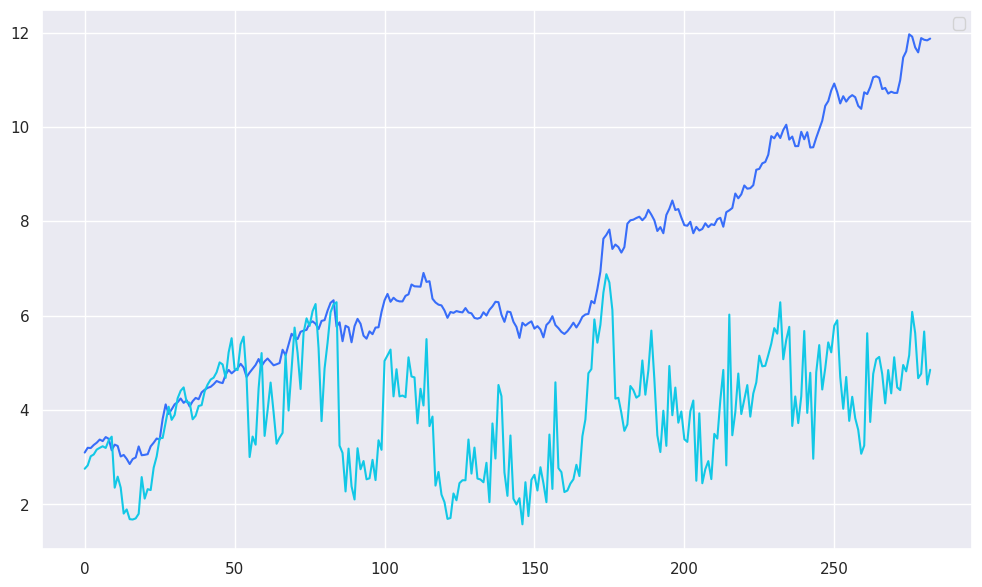

In [42]:
fig=plt.figure(figsize=(12,7))
plt.plot(Y_test)
plt.plot(y_pred)
plt.legend()
plt.show()

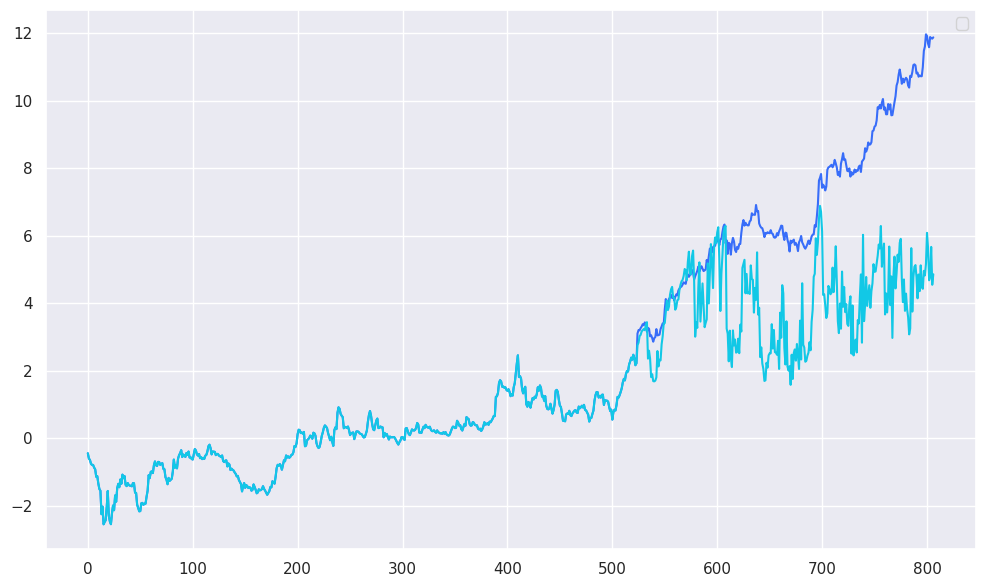

In [43]:
fig=plt.figure(figsize=(12,7))
plt.plot(Y_test)
plt.plot(y_pred)
plt.legend()
plt.show()
fig=plt.figure(figsize=(12,7))
plt.plot(np.append(y,Y_test))
plt.plot(np.append(y,y_pred))
plt.legend()
plt.show()

In [20]:
np.append(y,Y_test)

array([-7.56283690e-01, -8.12800937e-01, -8.28041509e-01, -8.68682653e-01,
       -8.82018470e-01, -8.82018470e-01, -9.10594629e-01, -9.29010331e-01,
       -1.00965847e+00, -1.00267314e+00, -1.08268620e+00, -1.14047336e+00,
       -1.16015897e+00, -1.41226315e+00, -1.33034533e+00, -1.52085237e+00,
       -1.49672194e+00, -1.47703633e+00, -1.33542544e+00, -1.16206396e+00,
       -1.43131415e+00, -1.48973661e+00, -1.51958246e+00, -1.40464321e+00,
       -1.31828012e+00, -1.36908172e+00, -1.21032596e+00, -1.27763874e+00,
       -1.13158327e+00, -1.08522603e+00, -1.12205789e+00, -1.03823462e+00,
       -1.08459141e+00, -9.86162649e-01, -1.02426397e+00, -1.00203806e+00,
       -1.09602156e+00, -1.10999199e+00, -1.07633571e+00, -1.09792654e+00,
       -1.10427703e+00, -1.10681686e+00, -1.11189743e+00, -1.07760608e+00,
       -1.07887600e+00, -1.18047989e+00, -1.18238511e+00, -1.30939003e+00,
       -1.34622097e+00, -1.38114716e+00, -1.37860733e+00, -1.29478407e+00,
       -1.29033880e+00, -